This homework will explore another application of the SVD: image watermarking. Suppose that you are a photographer making a living off your camera. You publish a photo online, only to find it was copied without crediting you! How can you prove someone took it without authorization? In this section, we will used SVD to embed a secure, invisible watermark in images. We will be following the method in [[Moulik et al., 2016]](https://pdfs.semanticscholar.org/de24/ece64ffefa3aacab30a4c08184af0ef251dc.pdf), Section 2.

The basic idea is as follows:
1. Compute the SVD of the original image and the watermark;<br><br>
1. Embed part of the SVD of the watermark in the matrix of singular values of the original image;<br><br>
1. Use this embedding to compute a new image using the $u$ and $v^T$ matrices from the original image. This image will  hopefully be visually indistinguishable from the original!

We will then show how to check if an image has the watermark embedded using the rest of the SVD of the watermark. By doing so, we can detect fraud: we can keep the watermark's SVD secret, preventing anyone who doesn't have it from either being able to embed the watermark or check if it's there.

> ## Make a copy of this notebook (File menu -> Make a Copy...)

### Homework Question 1: Embedding the Watermark


First, open the puppy's image file (*puppy.bmp*) into an array *P* and the watermark file *watermark.bmp* in an array *W*. Display both below. Then compute their SVDs $P = U_pS_pV_p^T$ and $W = U_wS_wV_w^T$. We will embed $U_wS_w$ into $S_p$, then create a new image by using this new matrix instead of $S_p$:
  * Compute a new matrix $S_1 = S_p + \alpha U_wS_w$, where $\alpha = 0.001$. Note that since we're only adding a very small multiple of $U_wS_w$ to $S_p$, so $S_1$ is still pretty close to being diagonal!<br><br>
  * Now compute $P_w = U_p S_1 V_p^T$ and display the image side-by-side with the original image of the puppy. If you did the above steps correctly, you should notice very little difference! Explain why this is the case, and why the new image has the watermark embedded in it!

In [48]:
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib notebook
import matplotlib.pylab as plt
#np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
np.set_printoptions()

<IPython.core.display.Javascript object>


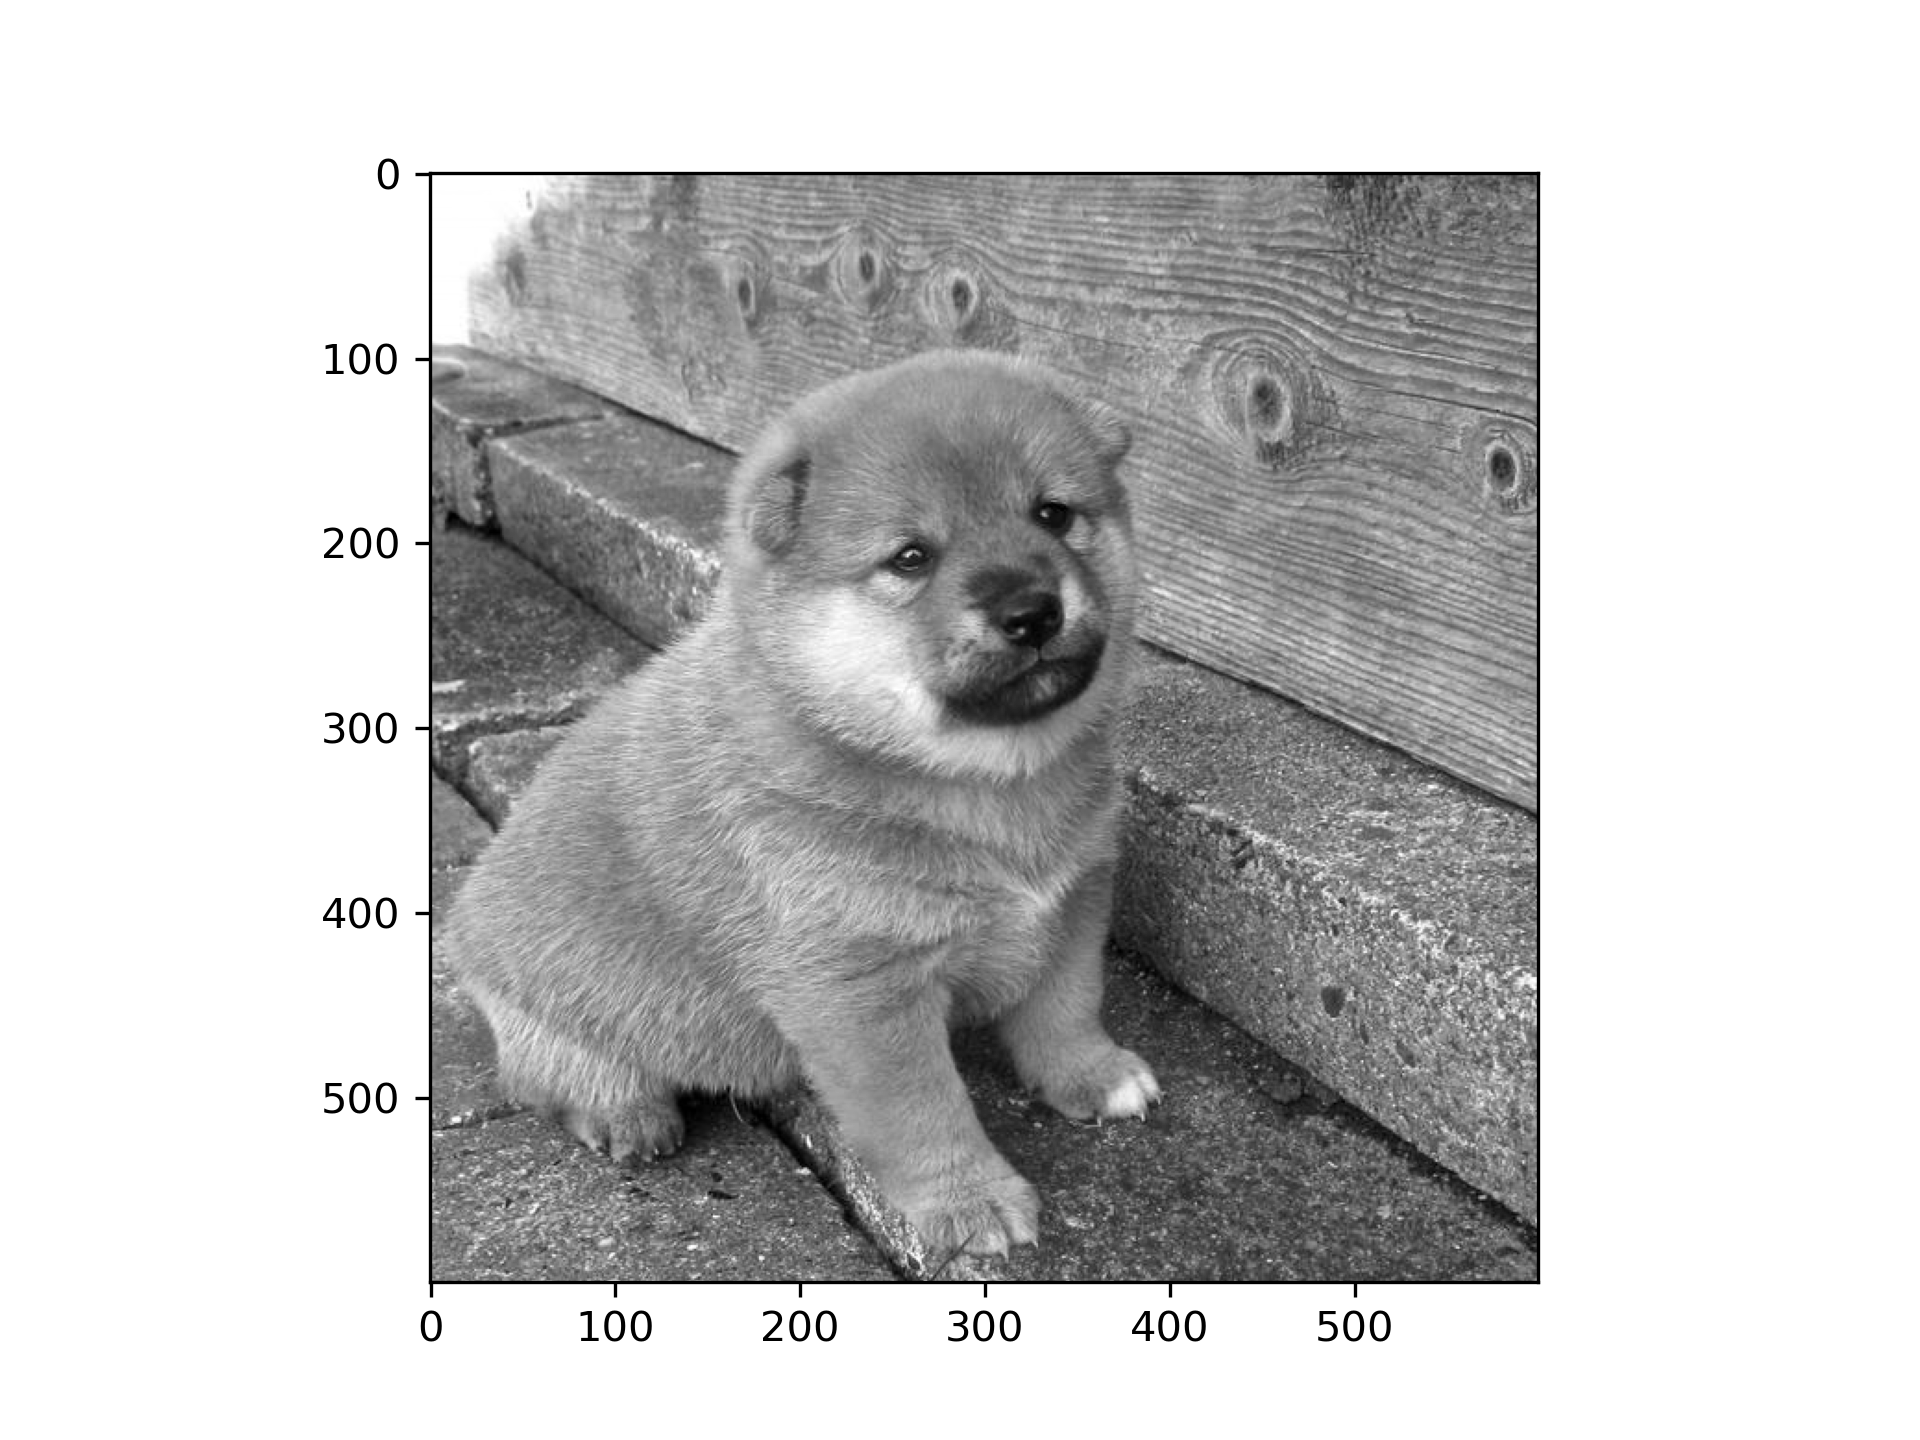

[[ 8.01693374e+04 -2.58972255e-02  1.57555760e-02 ... -1.55607099e-31
   1.40531010e-32 -1.45685619e-15]
 [-6.24206399e+00  1.10243614e+04  1.57555760e-02 ... -7.58634077e-32
  -8.23101066e-32 -1.89847218e-16]
 [-6.24206399e+00 -2.58972255e-02  7.36318792e+03 ...  3.23070021e-32
   1.04108503e-31  1.05128359e-16]
 ...
 [-6.24206399e+00 -2.58972255e-02  1.57555760e-02 ...  1.65421614e-01
  -1.19840097e-15  3.06146475e-17]
 [-6.24206399e+00 -2.58972255e-02  1.57555760e-02 ...  1.31824106e-14
   1.00536174e-01  3.06146475e-17]
 [-6.24206399e+00 -2.58972255e-02  1.57555760e-02 ... -1.19840097e-15
   1.31824106e-14  1.45932528e-02]]
[[254.79899956 254.79979788 254.786403   ... 119.98471367  86.97795271
   65.97048158]
 [254.87898385 254.88822658 254.88230536 ... 100.89173284  89.89121571
   82.87138441]
 [255.35028565 255.3637203  255.3721754  ...  94.38435218  97.38100767
   96.34751312]
 ...
 [127.82815162 111.81034762 102.81892984 ...  82.93715508 103.94824822
  106.9661779 ]
 [195.95652

In [49]:
P=plt.imread('puppy.bmp')
W= plt.imread('watermark.bmp')
plt.imshow(P,cmap='gray')
plt.imshow(W,cmap='gray')

#fig, ax = plt.subplots()
Up,Sp,VpT = np.linalg.svd(P) #np.linalg.svd returns U, S (as an array), and VT
Sigp= np.diag(Sp)
#Vp = Vp.T

#fig, ax = plt.subplots()
Uw,Sw,VwT = np.linalg.svd(W)
Sigw = np.diag(Sw)
#Vw = Vw.T

a = 0.001
S1 = Sigp + a*Uw@Sigw
print(S1)
Pw = Up@S1@VpT
print(Pw)
plt.imshow(Pw, cmap = 'gray')
#@interact(k=widgets.IntSlider(min=1,max=300,step=1,value=1,continuous_update=True))
#def update(k):
#    ax.imshow(SVDRebuild(U,Sig,V,k),cmap='gray')

The image is almost identical because we essentially added a small, small fraction of a value to each diagonal value of the Sigma matrix (added to each of the sigma values), while Up and VpT remained the same. Thus, because this value was so small, it is indistinguishable from the original image to our eye, but it still has a tiny portion of the watermark in it.

### Homework Question 2: Recovering the Watermark

Suppose that $P$ is the original puppy image and $P_w$ is the puppy with the embedded watermark as computed above. Recall that $P_w = U_pS_1V^T_p$, where $S_1 = S_p + \alpha U_wS_w$. Substitute these definitions in to show that 

$$\frac1\alpha\left(U_p^T(P_w - P)V_p\right) = U_wS_w$$

(Recall that in the SVD $A=USV^T$, $U$ and $V$ are orthogonal matrices!)

With the matrices you created in Homework Question 1, compute the left hand side of the above expression. Then multiply it by $V^T_w$ and display the result as an image. Explain what just happened.

In [64]:
Left = (Up.T@(Pw-P)@Vp.T)/a
Left = Left @ VwT
print(Left)
plt.imshow(Left, cmap = 'gray')

#This is just a matrix of 

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


### Homework Question 3: THIEF, THIEF!

Lastly, we will check that this watermark secures the image.

Display the image with the invisible watermark. Make sure you're displaying 600 by 600 pixels as follows:

```python
dpi = 60.0
xpixels, ypixels = 600, 600

fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
fig.figimage(img)
plt.show()
```

Then take a screenshot of it (**YOU THIEF!**). Try to cover up your tracks by opening the screenshot in your favorite image editing program: crop it and/or resize it to $600\times 600$ to match the original. Save it as a grayscale image in bmp format.

(Note: grayscale is important here. You don't just want it to be a color image format of an image that happens to be gray.)

Open your stolen image into an array $SI$. Check its *shape*. If it's anything but *(600,600)*, you did something wrong above. Then repeat your computation from the left hand of the equation in Homework Question 2, replacing $P_w$ with $SI$. Display your result. What can you say? Explain how this procedure secures images.

<IPython.core.display.Javascript object>


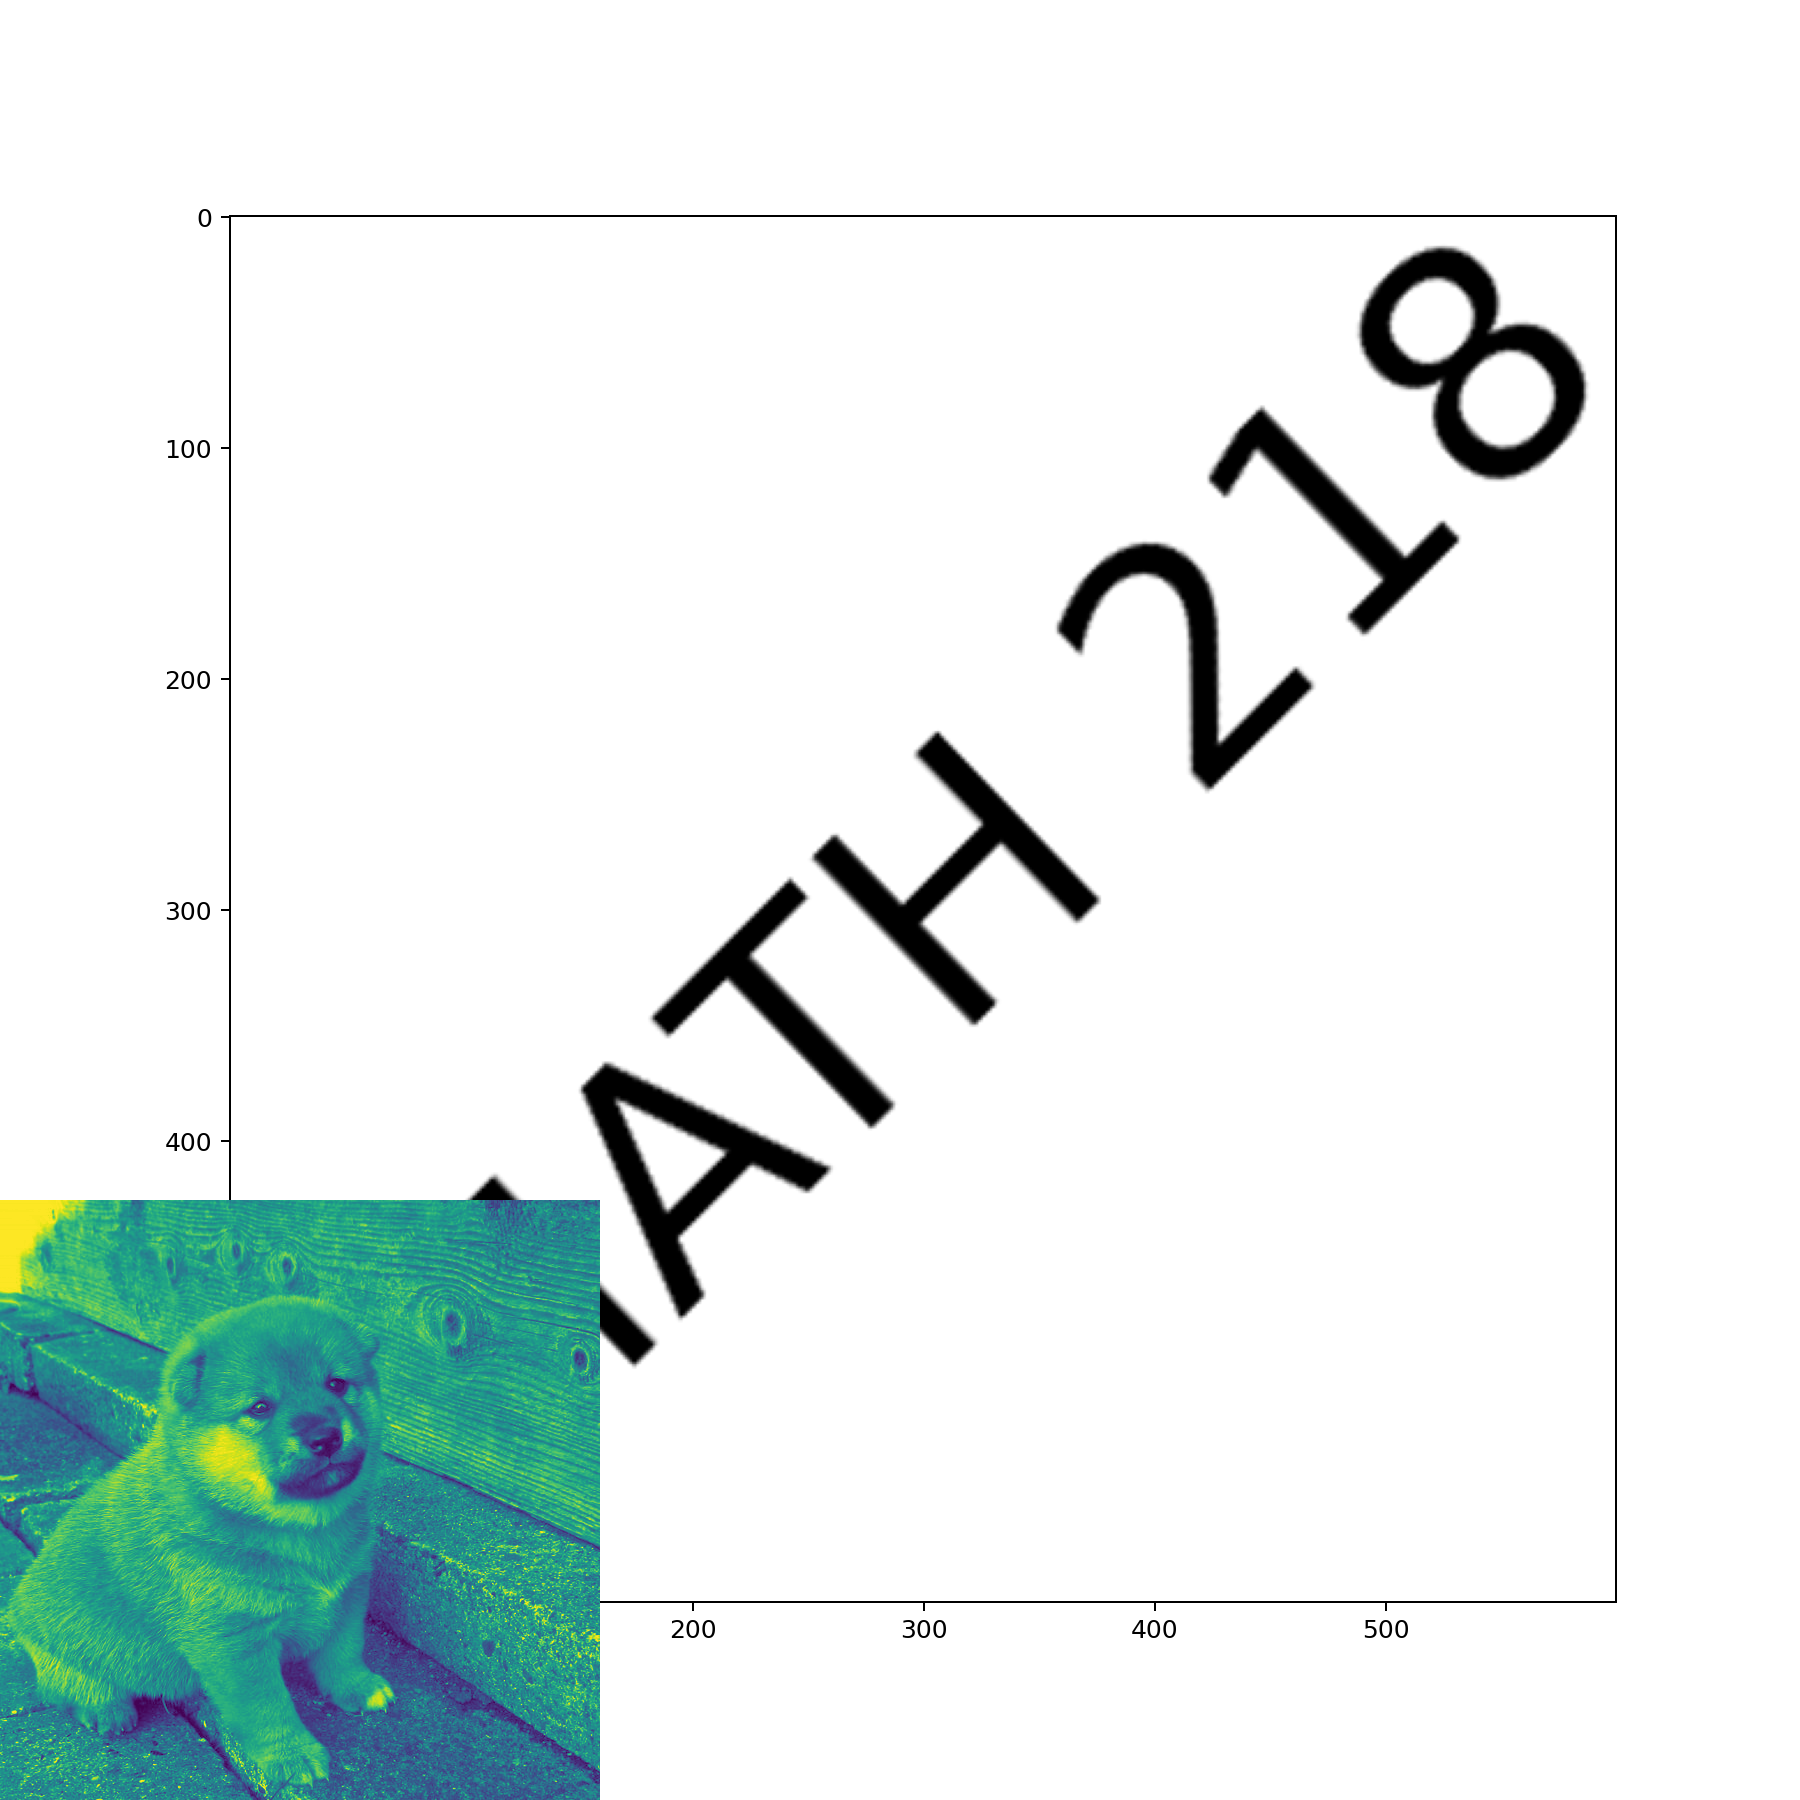

(600, 600)


In [62]:
dpi = 60.0
xpixels, ypixels = 600, 600


fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
fig.figimage(Pw)
plt.show()

WP= plt.imread('watermarkedpuppy.bmp')
plt.imshow(WP,cmap='gray')

print(np.shape(P))